In [116]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
from qutip import *
import matplotlib.gridspec as gridspec
from scipy.integrate import trapezoid


In [117]:
N1 = 4
N2 = 4

In [ ]:
class quadrature_operator:
    def __init__(self, n):
        self.n = n

        a = destroy(n)
        adag = a.dag()

        self.x = (a + adag)*1/np.sqrt(2)
        self.p = 1j * (adag - a)*1/np.sqrt(2)

class operator:
    def __init__(self,n, quadrature):
        self.n = n
        self.quadrature = quadrature

        a = destroy(self.n)
        adag = a.dag()

        self.a = a
        self.adag = adag

    def squeezing_operator(self,phi,z):

        self.phi = phi
        self.z = z

        exponent =  ((-phi*1j*self.a**2).expm()) - (phi*1j*self.adag**2)* np.log(z)/2
        self.squeezing_operator =  exponent .expm()

        return self.squeezing_operator

    def rotation_operator(self,phi):
        self.phi = phi
        self.rotation_operator = (1j * phi * self.adag * self.a).expm()
        return self.rotation_operator
    
    def displacement_operator_x(self,s):
        self.s = s

        self.displacement_operator = (- 1j * s * self.quadrature.p).expm()
        return self.displacement_operator
    
    def displacement_operator_p(self,t):
        self.t = t

        self.displacement_operator = ( 1j * t * self.quadrature.x).expm()
        return self.displacement_operator
    
    def vacuum_state(self):
        vacuum = basis(self.n,0)

        return vacuum

    
class transformation:
    def __init__(self, operator, quadrature):

        self.operator = operator
        self.quadrature = quadrature
        self.transformation = operator.dag() * quadrature * operator 


In [119]:
delta_x = 0.1
delta_p = delta_x

mu = 2

x = np.linspace(-6, 6, 100)
p = np.linspace(-6, 6, 100)

$ \ket{j, \Delta_x, \Delta_p} = \sum_n{ e^{-\frac{1}{2}\cdot \Delta_p^2((2n + j)\sqrt{\pi\hbar})^2}\hat{X}}(2n + j)\sqrt{\pi\hbar}\ket{\Delta_x}$

$\ket{\Delta_x}=\hat{S}(\Delta_x^{-1})\ket{0}$

In [120]:
#vacuum = op.vacuum_state()


#squeezing = op.squeezing_operator(phi = 0, z=1/delta_x)
#displacement = op.displacement_operator_x(s=0, p=p)

## CAT STATES

In [121]:
N = 60
psi = coherent(N,alpha=1) - coherent(N,alpha=-1)

sq = squeeze(N, z = 0.5)

psi_sq = (sq * psi).unit()


In [122]:
W_3 = wigner(psi_sq, x, p)

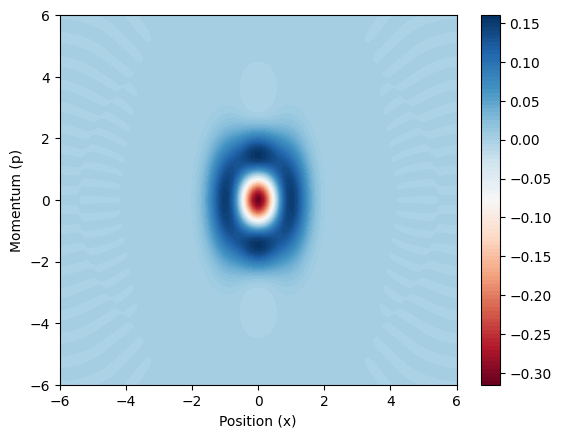

In [123]:
import matplotlib.pyplot as plt
plt.contourf(x, p, W_3, levels=100, cmap='RdBu')
plt.xlabel("Position (x)")
plt.ylabel("Momentum (p)")
plt.colorbar()
plt.show()

## GKP STATES

In [ ]:
def GKP_states(N, delta_x, delta_p, j):

    n_max = 20
    n = np.arange(-n_max, n_max+1)

    sq_operator = squeeze(N, z = np.log(1/delta_x))


    vacuum = basis(N,0)

    #first apply squeeze
    psi_0 = sq_operator * vacuum
    psi_1 = 0 * psi_0

    for i in range(len(n)):
        dis_operator = displace(N, alpha = (2*n[i]+j)*np.sqrt(np.pi))
        exponent = -0.5 * delta_p**2 * ( (2*n[i]+j) * np.sqrt(2)) **2
        psi_1 += dis_operator * psi_0 * np.exp(exponent)

    return psi_1.unit()

N=200

In [125]:
gkp_state_0 = GKP_states(N, delta_x=0.4, delta_p=0.4, j = 0)
gkp_state_1 = GKP_states(N, delta_x=0.1, delta_p=0.1, j = 0)
gkp_state_2 = GKP_states(N, delta_x=0.3, delta_p=0.3*1/3, j = 0)
gkp_state_3 = GKP_states(N, delta_x=0.3, delta_p=0.3*3, j = 0)

In [126]:
gkp_state_01 = GKP_states(N, delta_x=0.4, delta_p=0.4, j = 1)
gkp_state_11 = GKP_states(N, delta_x=0.1, delta_p=0.1, j = 1)
gkp_state_21 = GKP_states(N, delta_x=0.3, delta_p=0.3*1/3, j = 1)
gkp_state_31 = GKP_states(N, delta_x=0.3, delta_p=0.3*3, j = 1)

In [ ]:
quad = quadrature_operator(400) 
op = operator(400,quad)            
displacement_x = op.displacement_operator_x(1)
displacement_p = op.displacement_operator_p(1)

op_rot = operator(400, quad)
rotation = op_rot.rotation_operator(np.pi/4)

In [151]:
dis_gkp_x = displacement_x * gkp_state_0
dis_gkp_p = displacement_p * gkp_state_0

dis_W_GKP_0_x = wigner(dis_gkp_x, x, p)
dis_W_GKP_0_p = wigner(dis_gkp_p, x, p)

rot_W_GKP_0 = wigner(rotation * gkp_state_0, x, p)


In [152]:
squeezing = op.squeezing_operator(phi=np.pi, z=1/0.4)
sq_W_GKP_0 = wigner(squeezing * gkp_state_0, x, p)

TypeError: Qobj.__call__() got an unexpected keyword argument 'phi'

In [129]:
W_GKP_0 = wigner(gkp_state_0, x, p)
W_GKP_1 = wigner(gkp_state_1, x, p)
W_GKP_2 = wigner(gkp_state_2, x, p)
W_GKP_3 = wigner(gkp_state_3, x, p)

In [130]:
W_GKP_01 = wigner(gkp_state_01, x, p)
W_GKP_11 = wigner(gkp_state_11, x, p)
W_GKP_21 = wigner(gkp_state_21, x, p)
W_GKP_31 = wigner(gkp_state_31, x, p)

In [131]:
vmin = min(W_GKP_0.min(), W_GKP_1.min(), W_GKP_2.min(), W_GKP_3.min(), W_GKP_01.min(), W_GKP_11.min(), W_GKP_21.min(), W_GKP_31.min())
vmax = max(W_GKP_0.max(), W_GKP_1.max(), W_GKP_2.max(), W_GKP_3.max(), W_GKP_01.max(), W_GKP_11.max(), W_GKP_21.max(), W_GKP_31.max())

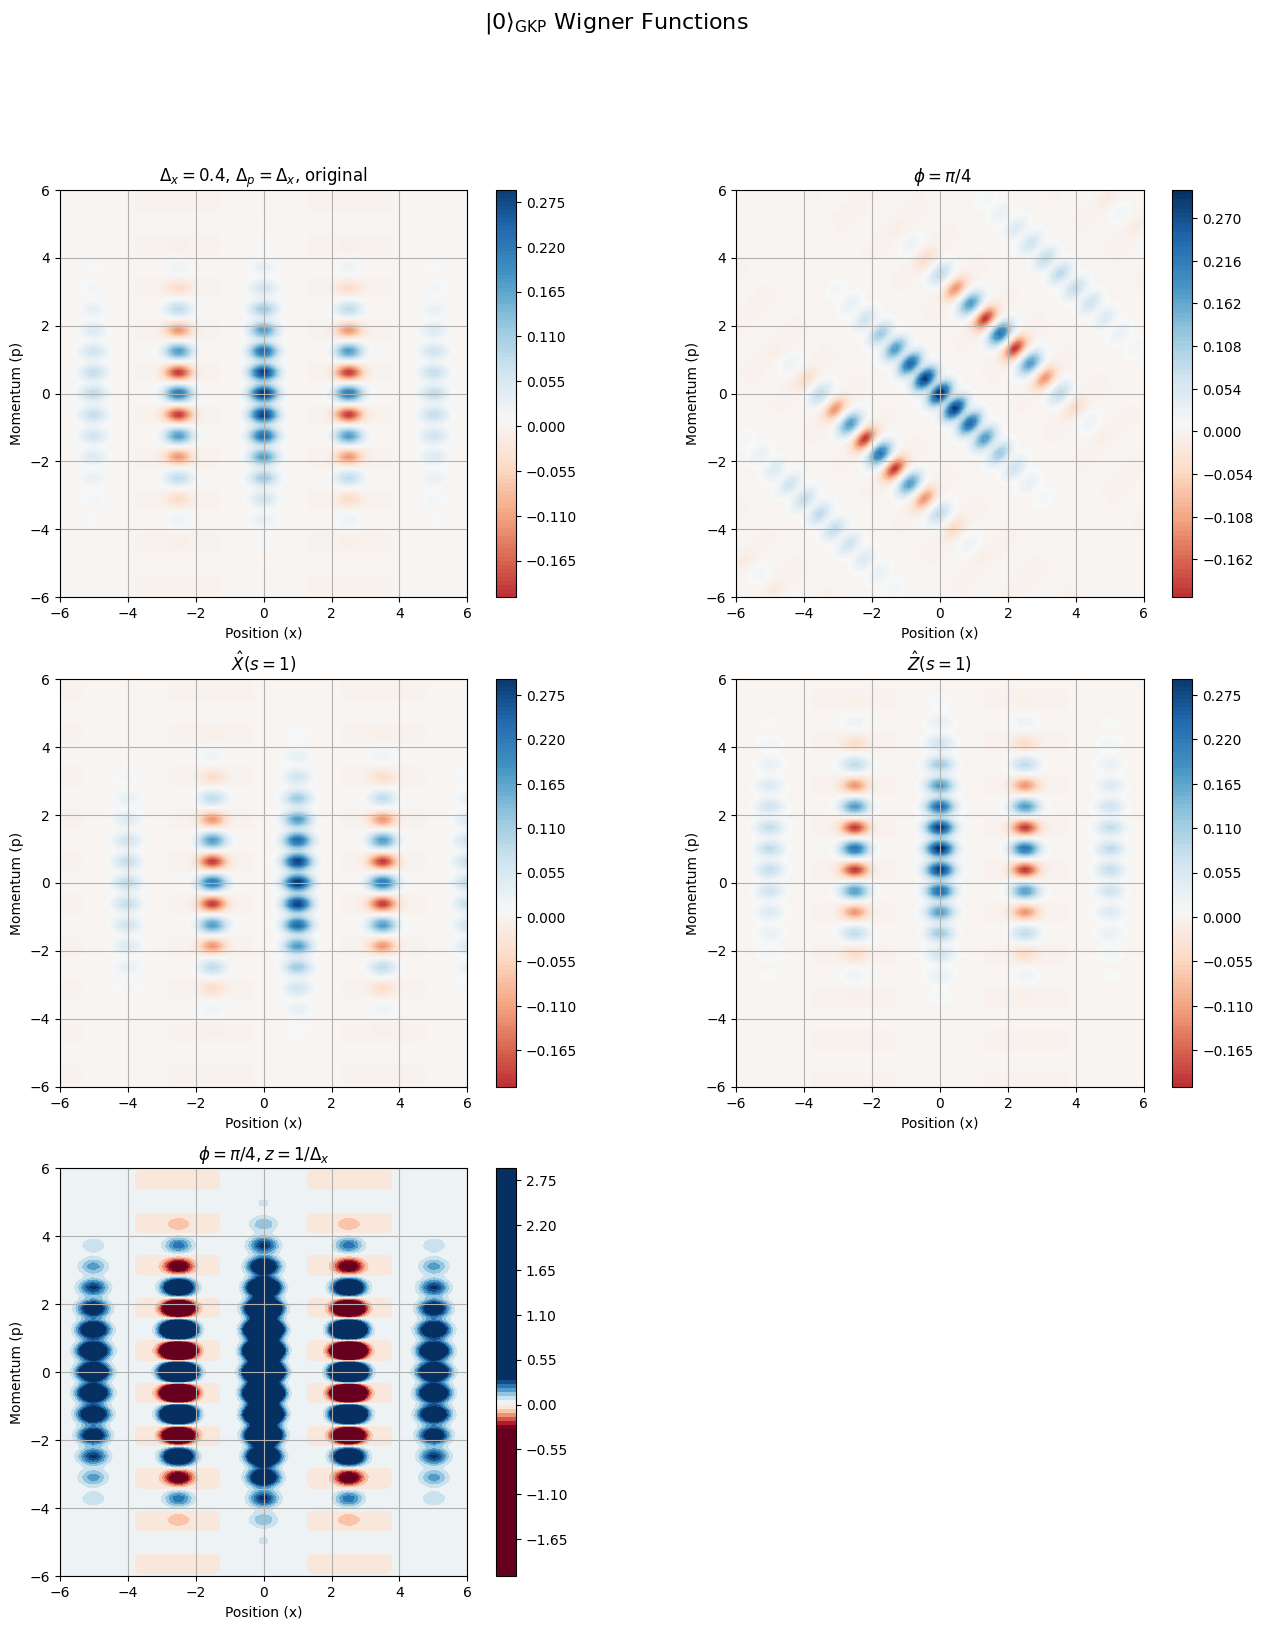

In [140]:
fig, axs = plt.subplots(3, 2, figsize=(16, 18))

plt.suptitle(r"$|0\rangle_{\rm GKP}$ Wigner Functions", fontsize=16)

cf1 = axs[0, 0].contourf(x, p, W_GKP_0, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[0, 0].set_xlabel("Position (x)")
axs[0, 0].set_ylabel("Momentum (p)")
axs[0, 0].set_title(r"$\Delta_x=0.4$, $\Delta_p=\Delta_x$, original")
axs[0, 0].set_aspect('equal')
axs[0, 0].grid()
fig.colorbar(cf1, ax=axs[0, 0])

cf2 = axs[1, 0].contourf(x, p, dis_W_GKP_0_x, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[1, 0].set_xlabel("Position (x)")
axs[1, 0].set_ylabel("Momentum (p)")
axs[1, 0].set_title(r"$\hat{X}(s=1)$")
axs[1, 0].set_aspect('equal')
axs[1, 0].grid()
fig.colorbar(cf2, ax=axs[1, 0])

cf3 = axs[0,1].contourf(x, p, rot_W_GKP_0, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[0,1].set_title(r" $\phi = \pi/4$")
axs[0,1].set_xlabel("Position (x)")
axs[0,1].set_ylabel("Momentum (p)")
axs[0,1].set_aspect('equal')
axs[0,1].grid()
fig.colorbar(cf3, ax=axs[0,1])

cf4 = axs[1, 1].contourf(x, p, dis_W_GKP_0_p, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[1, 1].set_xlabel("Position (x)")
axs[1, 1].set_ylabel("Momentum (p)")
axs[1, 1].set_title(r"$\hat{Z}(s=1)$")
axs[1, 1].set_aspect('equal')
axs[1, 1].grid()
fig.colorbar(cf2, ax=axs[1, 1])

cf4 = axs[2,0].contourf(x, p, sq_W_GKP_0, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[2,0].set_xlabel("Position (x)")
axs[2,0].set_ylabel("Momentum (p)")
axs[2,0].set_title(r"$\phi = \pi/4, z = 1/\Delta_x$")
axs[2,0].set_aspect('equal')
axs[2,0].grid()
fig.colorbar(cf4, ax=axs[2,0])

axs[2,1].remove()



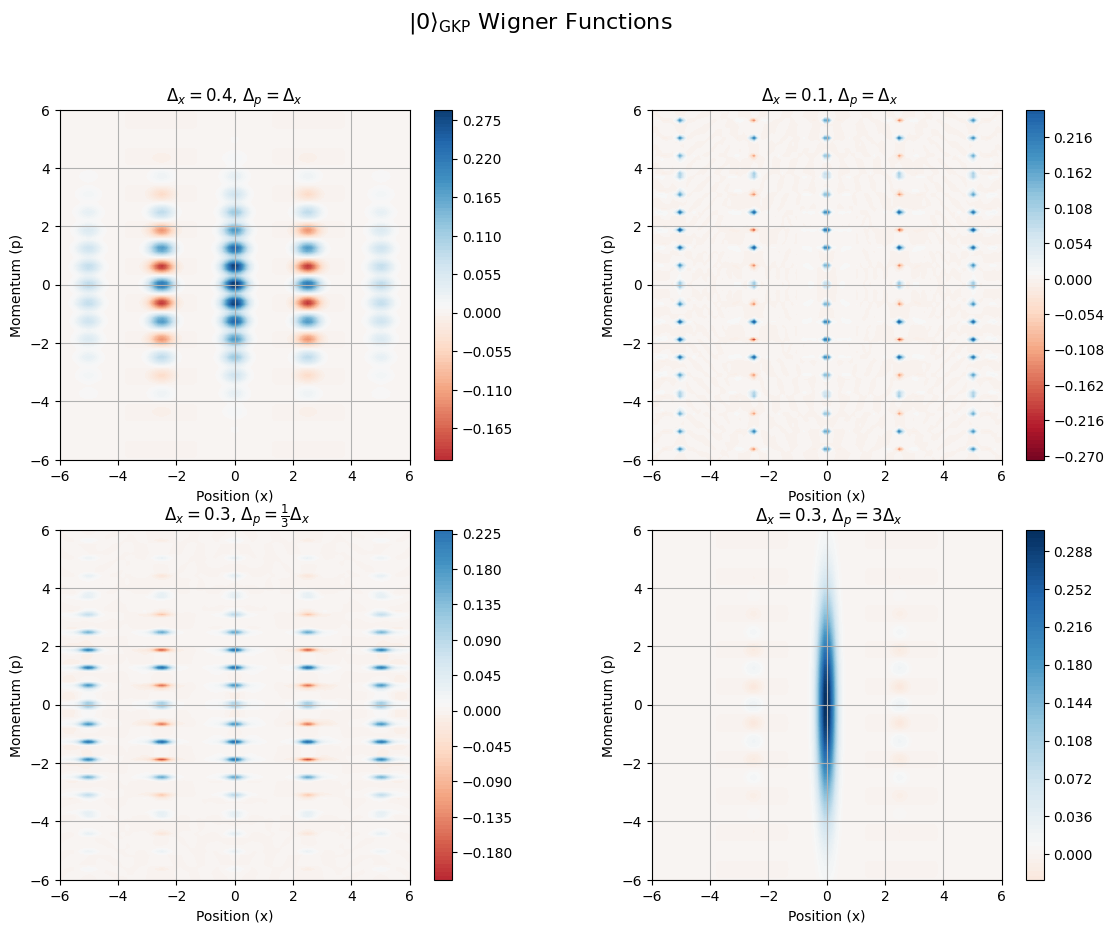

In [133]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

plt.suptitle(r"$|0\rangle_{\rm GKP}$ Wigner Functions", fontsize=16)

cf1 = axs[0,0].contourf(x, p, W_GKP_0, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[0,0].set_xlabel("Position (x)")
axs[0,0].set_ylabel("Momentum (p)")
axs[0,0].set_title(r"$\Delta_x=0.4$, $\Delta_p=\Delta_x$")
axs[0,0].set_aspect('equal')
axs[0,0].grid()
fig.colorbar(cf1, ax=axs[0,0])

cf2 = axs[0,1].contourf(x, p, W_GKP_1, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[0,1].set_title(r" $\Delta_x=0.1$, $\Delta_p=\Delta_x$")
axs[0,1].set_xlabel("Position (x)")
axs[0,1].set_ylabel("Momentum (p)")
axs[0,1].set_aspect('equal')
axs[0,1].grid()
fig.colorbar(cf2, ax=axs[0,1])

cf3 = axs[1,0].contourf(x, p, W_GKP_2, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[1,0].set_title(r" $\Delta_x=0.3$, $\Delta_p=\frac{1}{3}\Delta_x$")
axs[1,0].set_xlabel("Position (x)")
axs[1,0].set_ylabel("Momentum (p)")
axs[1,0].set_aspect('equal')
axs[1,0].grid()
fig.colorbar(cf3, ax=axs[1,0])

cf4 = axs[1,1].contourf(x, p, W_GKP_3, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[1,1].set_title(r" $\Delta_x=0.3$, $\Delta_p=3\Delta_x$")
axs[1,1].set_xlabel("Position (x)")
axs[1,1].set_ylabel("Momentum (p)")
axs[1,1].set_aspect('equal')
axs[1,1].grid()
fig.colorbar(cf4, ax=axs[1,1])

plt.show()


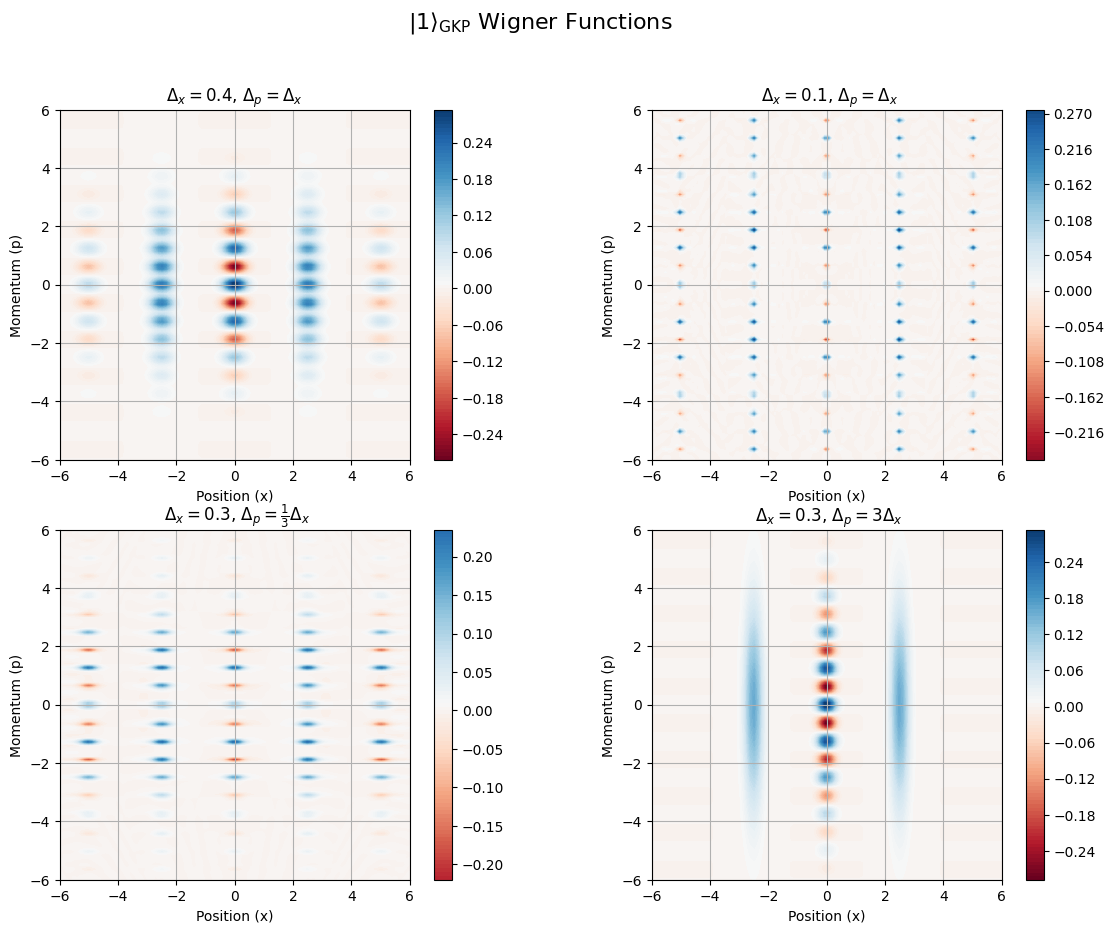

In [134]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

plt.suptitle(r"$|1\rangle_{\rm GKP}$ Wigner Functions", fontsize=16)

cf1 = axs[0,0].contourf(x, p, W_GKP_01, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[0,0].set_xlabel("Position (x)")
axs[0,0].set_ylabel("Momentum (p)")
axs[0,0].set_title(r"$\Delta_x=0.4$, $\Delta_p=\Delta_x$")
axs[0,0].set_aspect('equal')
axs[0,0].grid()
fig.colorbar(cf1, ax=axs[0,0])

cf2 = axs[0,1].contourf(x, p, W_GKP_11, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[0,1].set_title(r" $\Delta_x=0.1$, $\Delta_p=\Delta_x$")
axs[0,1].set_xlabel("Position (x)")
axs[0,1].set_ylabel("Momentum (p)")
axs[0,1].set_aspect('equal')
axs[0,1].grid()
fig.colorbar(cf2, ax=axs[0,1])

cf3 = axs[1,0].contourf(x, p, W_GKP_21, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[1,0].set_title(r" $\Delta_x=0.3$, $\Delta_p=\frac{1}{3}\Delta_x$")
axs[1,0].set_xlabel("Position (x)")
axs[1,0].set_ylabel("Momentum (p)")
axs[1,0].set_aspect('equal')
axs[1,0].grid()
fig.colorbar(cf3, ax=axs[1,0])

cf4 = axs[1,1].contourf(x, p, W_GKP_31, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)
axs[1,1].set_title(r" $\Delta_x=0.3$, $\Delta_p=3\Delta_x$")
axs[1,1].set_xlabel("Position (x)")
axs[1,1].set_ylabel("Momentum (p)")
axs[1,1].set_aspect('equal')
axs[1,1].grid()
fig.colorbar(cf4, ax=axs[1,1])

plt.show()


In [19]:
Px_0 = trapezoid(W_GKP_0, p, axis=0)  
Pp_0 = trapezoid(W_GKP_0, x, axis=1)

Px_01 = trapezoid(W_GKP_01, p, axis=0)
Pp_01 = trapezoid(W_GKP_01, x, axis=1)

Px_1 = trapezoid(W_GKP_1, p, axis=0)
Pp_1 = trapezoid(W_GKP_1, x, axis=1)


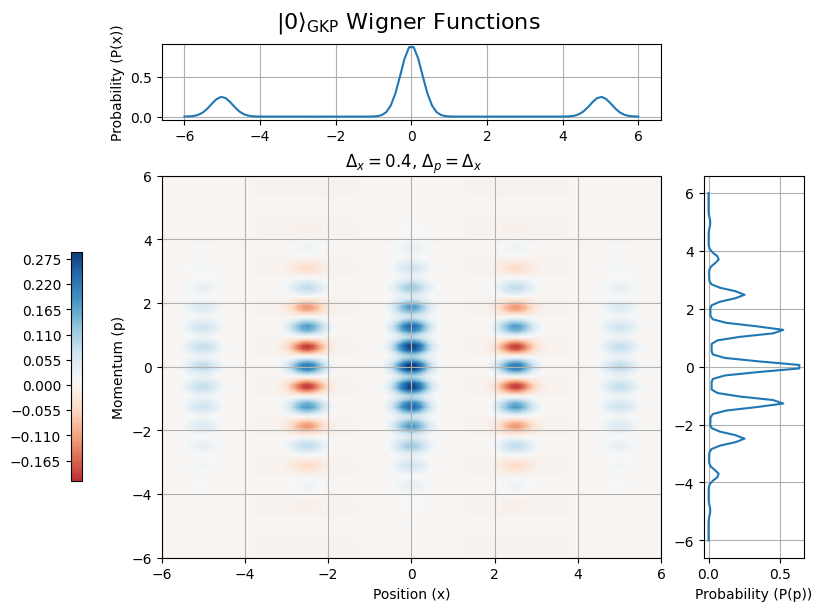

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6), constrained_layout=True, gridspec_kw={"height_ratios": [0.2, 1], "width_ratios": [1, 0.2]})

plt.suptitle(r"$|0\rangle_{\rm GKP}$ Wigner Functions", fontsize=16)

axs[0, 0].plot(x,Px_0)
axs[0, 0].set_ylabel("Probability (P(x))")
axs[0,0].grid()

#axs[0, 0].set_title("Top-left")

axs[0, 1].axis('off')  # disables axes for this cell

cf3 = axs[1,0].contourf(x, p, W_GKP_0, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)

axs[1,0].set_title(r" $\Delta_x=0.4$, $\Delta_p=\Delta_x$")
axs[1,0].set_xlabel("Position (x)")
axs[1,0].set_ylabel("Momentum (p)")
axs[1,0].grid()
fig.colorbar(cf3, ax=axs[1,0], location = 'left', shrink = 0.6)

axs[1, 1].plot(Pp_0,p)
axs[1, 1].set_xlabel("Probability (P(p))")
axs[1, 1].grid()


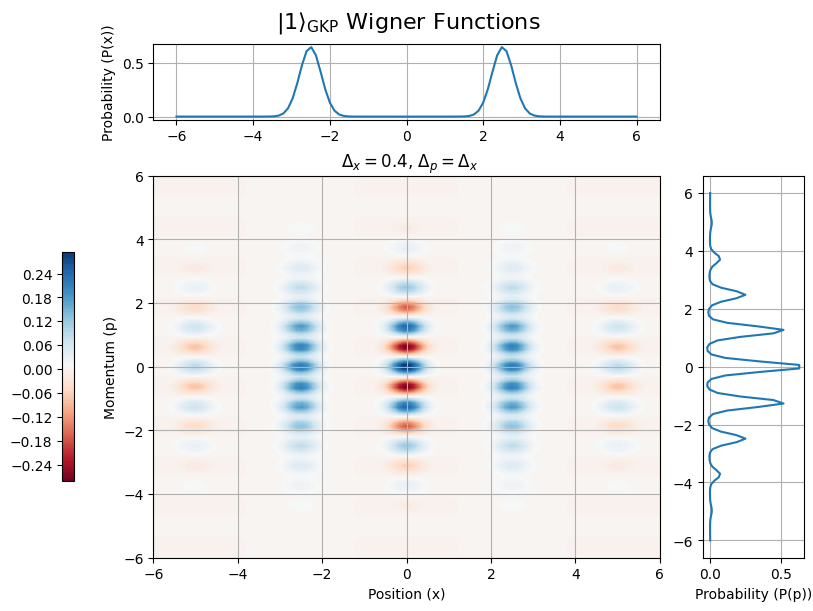

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6), constrained_layout=True, gridspec_kw={"height_ratios": [0.2, 1], "width_ratios": [1, 0.2]})

plt.suptitle(r"$|1\rangle_{\rm GKP}$ Wigner Functions", fontsize=16)

axs[0, 0].plot(x,Px_01)
axs[0, 0].set_ylabel("Probability (P(x))")
axs[0,0].grid()

#axs[0, 0].set_title("Top-left")

axs[0, 1].axis('off')  # disables axes for this cell

cf3 = axs[1,0].contourf(x, p, W_GKP_01, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)

axs[1,0].set_title(r" $\Delta_x=0.4$, $\Delta_p=\Delta_x$")
axs[1,0].set_xlabel("Position (x)")
axs[1,0].set_ylabel("Momentum (p)")
axs[1,0].grid()
fig.colorbar(cf3, ax=axs[1,0], location = 'left', shrink = 0.6)

axs[1, 1].plot(Pp_01,p)
axs[1, 1].set_xlabel("Probability (P(p))")
axs[1, 1].grid()


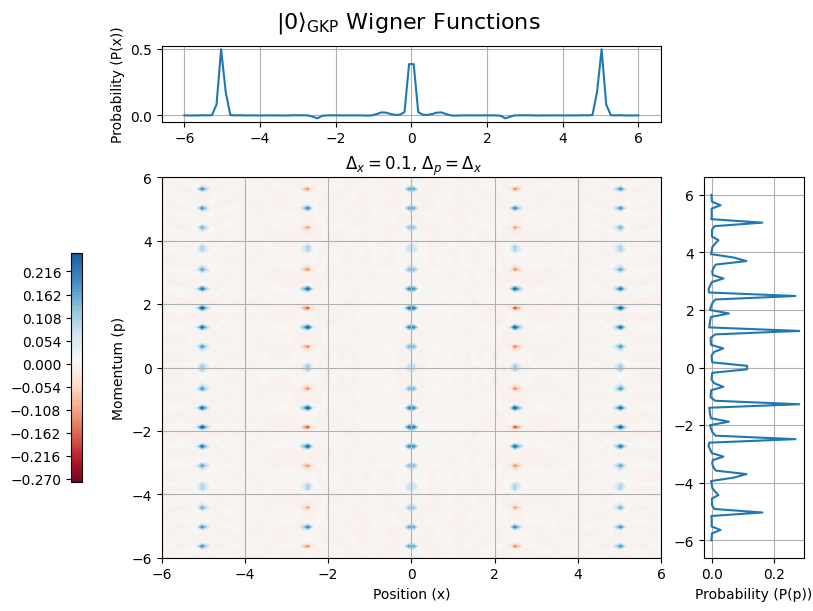

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6), constrained_layout=True, gridspec_kw={"height_ratios": [0.2, 1], "width_ratios": [1, 0.2]})

plt.suptitle(r"$|0\rangle_{\rm GKP}$ Wigner Functions", fontsize=16)

axs[0, 0].plot(x,Px_1)
axs[0, 0].set_ylabel("Probability (P(x))")
axs[0,0].grid()

#axs[0, 0].set_title("Top-left")

axs[0, 1].axis('off')  # disables axes for this cell

cf3 = axs[1,0].contourf(x, p, W_GKP_1, levels=100, cmap='RdBu', vmin=vmin, vmax=vmax)

axs[1,0].set_title(r" $\Delta_x=0.1$, $\Delta_p=\Delta_x$")
axs[1,0].set_xlabel("Position (x)")
axs[1,0].set_ylabel("Momentum (p)")
axs[1,0].grid()
fig.colorbar(cf3, ax=axs[1,0], location = 'left', shrink = 0.6)

axs[1, 1].plot(Pp_1,p)
axs[1, 1].set_xlabel("Probability (P(p))")
axs[1, 1].grid()


In [23]:
gkp_state_0

Quantum object: dims=[[400], [1]], shape=(400, 1), type='ket', dtype=Dense
Qobj data =
[[ 6.63201604e-01]
 [ 1.88125183e-21]
 [-3.39223039e-01]
 [-2.04984722e-20]
 [ 2.16437176e-01]
 [-2.12492460e-19]
 [-1.21307077e-01]
 [-1.13060159e-18]
 [ 1.66711795e-01]
 [-2.23539190e-18]
 [ 1.14816240e-01]
 [ 3.63939687e-18]
 [ 3.62146960e-01]
 [ 1.09748369e-17]
 [ 3.39769964e-01]
 [ 9.69284726e-18]
 [ 2.69756510e-01]
 [-1.09055103e-18]
 [ 2.31001921e-03]
 [-2.53514182e-18]
 [-9.57179970e-02]
 [ 8.13253947e-20]
 [-5.44172444e-02]
 [ 1.22890126e-20]
 [ 4.72879196e-02]
 [-4.49798687e-19]
 [ 2.16614675e-02]
 [-5.44390958e-20]
 [-1.84496405e-02]
 [ 3.25736536e-19]
 [-1.16409579e-02]
 [ 7.52566234e-20]
 [ 1.40558570e-02]
 [-1.68546397e-19]
 [ 4.31510637e-04]
 [ 1.29784949e-19]
 [-5.08667375e-03]
 [-1.55410839e-20]
 [ 3.55359425e-03]
 [ 9.54009608e-20]
 [ 6.76590582e-03]
 [ 1.58668552e-19]
 [ 5.53997092e-03]
 [-7.59730233e-19]
 [ 1.45141477e-02]
 [ 4.05484219e-19]
 [ 2.34337211e-02]
 [-1.18547317e-18]
 

In [24]:

# psi is your GKP state
def displace_operator(alpha):
    psi_z = 0
    Z_L = displace(400, alpha)  # displacement operator in x
    psi_z = Z_L * gkp_state_0          # apply logical Z

    return psi_z

Text(0.5, 1.0, 'Wigner Function after X gate')

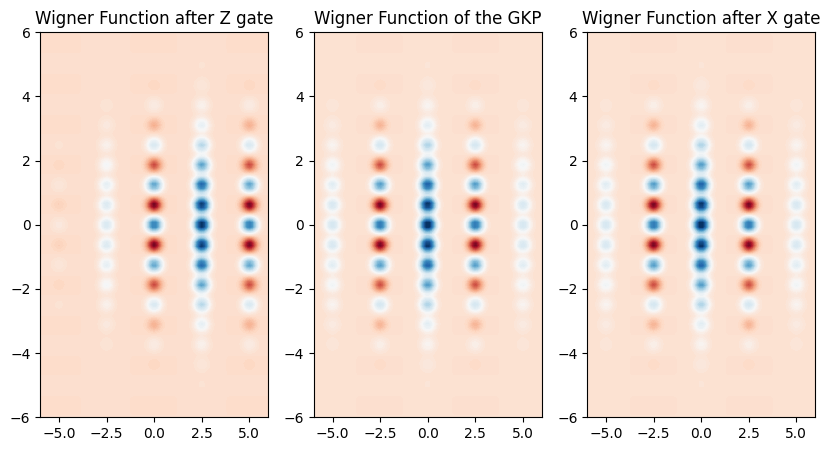

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))


axs[0].contourf(x, p, Wigner_z_apply_0, levels=100, cmap='RdBu')
axs[0].set_title("Wigner Function after Z gate")

axs[1].contourf(x, p, W_GKP_0, levels=100, cmap='RdBu')
axs[1].set_title("Wigner Function of the GKP")

axs[2].contourf(x, p, Wigner_x_apply_0, levels=100, cmap='RdBu')
axs[2].set_title("Wigner Function after X gate")
